# Telecom Churn Prediction

In [750]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import RFECV 

import warnings
warnings.filterwarnings("ignore")

In [424]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [461]:
# Reading the data

df_churn = pd.read_csv("telecom_churn_data.csv")
df_churn.shape

(99999, 226)

In [462]:
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [463]:
df_churn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [464]:
df_churn.memory_usage()

Index                          128
mobile_number               799992
circle_id                   799992
loc_og_t2o_mou              799992
std_og_t2o_mou              799992
loc_ic_t2o_mou              799992
last_date_of_month_6        799992
last_date_of_month_7        799992
last_date_of_month_8        799992
last_date_of_month_9        799992
arpu_6                      799992
arpu_7                      799992
arpu_8                      799992
arpu_9                      799992
onnet_mou_6                 799992
onnet_mou_7                 799992
onnet_mou_8                 799992
onnet_mou_9                 799992
offnet_mou_6                799992
offnet_mou_7                799992
offnet_mou_8                799992
offnet_mou_9                799992
roam_ic_mou_6               799992
roam_ic_mou_7               799992
roam_ic_mou_8               799992
roam_ic_mou_9               799992
roam_og_mou_6               799992
roam_og_mou_7               799992
roam_og_mou_8       

In [465]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df_churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


Before moving forward with Data Cleaning and Understanding steps, let's filter for only high-valued customers as they bring in the most revenue and are highly valuable to the firm. We define high-valued customers as the ones having Average Revenue per customer for June and July (good phase) above the 70th percentile. 

In [466]:
df_churn['tot_rev'] = df_churn.arpu_6 + df_churn.arpu_7
perc = df_churn.tot_rev.quantile(0.7)

In [467]:
df_churn = df_churn.loc[df_churn['tot_rev'] >= perc]

In [468]:
# dropping tot_rev

df_churn.drop('tot_rev',axis=1,inplace=True)

In [469]:
df_churn.shape

(30000, 226)

So, 30k customers are high-valued. Lets go ahead and define the target variable and tag churns based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase(September).

In [470]:
df_churn['churn'] = np.where((df_churn['total_ic_mou_9']==0.0) & (df_churn['vol_2g_mb_9']==0.0) & (df_churn['vol_3g_mb_9']==0.0) & (df_churn['total_og_mou_9']==0.0),1,0)

In [471]:
df_churn.churn.mean()

0.0884

Seems like only about 9% of the total customers are tagged churned. We will have to employ class imbalance techniques later.

#### Now lets drop all the features related to the churn phase as they won't be used for prediction. That means, all the columns with '_9'.

In [472]:
cols = [col for col in df_churn.columns if '_9' in col]
cols = np.asarray(cols)
cols

array(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9',
       'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_p

In [473]:
df_churn.drop(cols,axis = 1, inplace = True)

In [474]:
df_churn.shape

(30000, 173)

Okay, now that was some weight off the shoulders.

## Data Understanding and Cleaning

In [475]:
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,10

In [476]:
# Lets see missing values first

round(100*(df_churn.isnull().sum()/len(df_churn.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.43
std_og_t2o_mou               0.43
loc_ic_t2o_mou               0.43
last_date_of_month_6         0.00
last_date_of_month_7         0.14
last_date_of_month_8         0.65
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.11
onnet_mou_8                  3.41
offnet_mou_6                 1.05
offnet_mou_7                 1.11
offnet_mou_8                 3.41
roam_ic_mou_6                1.05
roam_ic_mou_7                1.11
roam_ic_mou_8                3.41
roam_og_mou_6                1.05
roam_og_mou_7                1.11
roam_og_mou_8                3.41
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.11
loc_og_t2t_mou_8             3.41
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.11
loc_og_t2m_mou_8             3.41
loc_og_t2f_mou

In [477]:
df_churn['loc_og_t2o_mou'].describe()

count    29872.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64

In [478]:
df_churn['loc_ic_t2o_mou'].describe()

count    29872.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64

In [479]:
df_churn['std_og_t2o_mou'].describe()

count    29872.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64

In [480]:
# Dropping these useless features

df_churn.drop(['std_og_t2o_mou','loc_og_t2o_mou','loc_ic_t2o_mou'],axis = 1,inplace = True)

Checking if the last data recharge date columns have the same null values as the recharge amount ones because this could mean that the customers didn't get any recharge for that following month.

In [481]:
# Dealing with data recharge variables first

df_temp_6 = df_churn.loc[((pd.isnull(df_churn['date_of_last_rech_data_6'])) & (pd.notnull(df_churn['total_rech_data_6']))) | ((pd.notnull(df_churn['date_of_last_rech_data_6'])) & (pd.isnull(df_churn['total_rech_data_6'])))]
df_temp_7 = df_churn.loc[((pd.isnull(df_churn['date_of_last_rech_data_7'])) & (pd.notnull(df_churn['total_rech_data_7']))) | ((pd.notnull(df_churn['date_of_last_rech_data_7'])) & (pd.isnull(df_churn['total_rech_data_7'])))]
df_temp_8 = df_churn.loc[((pd.isnull(df_churn['date_of_last_rech_data_8'])) & (pd.notnull(df_churn['total_rech_data_8']))) | ((pd.notnull(df_churn['date_of_last_rech_data_8'])) & (pd.isnull(df_churn['total_rech_data_8'])))]

In [482]:
print(len(df_temp_6.index))
print(len(df_temp_7.index))
print(len(df_temp_8.index))

0
0
0


So far so good.

In [483]:
recharge_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7',
                 'max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7',
                 'count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

df_churn[recharge_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000
mean,2.460379,2.710502,2.635508,150.197627,151.363528,141.472680,1.635403,1.843960,1.834818,0.824976,0.866542,0.800689,238.859738,251.270804,229.402058
std,2.940171,3.237065,3.224167,123.973417,126.864722,125.697604,2.480498,2.742953,2.610523,1.603826,1.761366,1.738626,245.465956,249.633443,235.895054
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,41.000000,33.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,115.000000,92.000000
50%,1.000000,2.000000,2.000000,154.000000,154.000000,154.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,177.000000,187.000000,170.000000
75%,3.000000,3.000000,3.000000,198.000000,198.000000,198.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,296.000000,304.000000,271.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,39.000000,48.000000,44.000000,29.000000,35.000000,45.000000,7546.000000,4365.000000,4061.000000


For the features from the list above, if the minimum value is 1, that means the customers didnt get any recharge and so we can impute the missing values with 0. We cant say about the null values in the columns that have 0 as the minimum value. Those missing values can be Missing not at Random (MNAR). The rest of the features could be dropped as the number of missing values is too much and wont contribute in the model performace.

In [484]:
impute_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7',
                 'max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
df_churn[impute_cols] = df_churn[impute_cols].fillna(0)

In [485]:
# Drooping the features with too many missing values

cols_to_drop = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7',
                 'count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']
df_churn.drop(cols_to_drop,axis=1,inplace=True)

In [486]:
# Droping the datetime and id columns as weel as they have no significance in the prediction

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]
df_churn.drop(id_cols+date_cols,axis=1,inplace=True)

In [487]:
df_churn.shape

(30000, 147)

In [488]:
# Churn phase column

df_churn.drop('sep_vbc_3g',axis=1,inplace=True)

Lets replace categorical variables missing values with a new category.

In [489]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]
df_churn['night_pck_user_6'].value_counts()

0.0    11235
1.0      312
Name: night_pck_user_6, dtype: int64

Lets introduce -1 for all the missing values.

In [490]:
df_churn[cat_cols] = df_churn[cat_cols].fillna(-1)

In [491]:
round(100*(df_churn.isnull().sum()/len(df_churn.index)),2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.05
onnet_mou_7           1.11
onnet_mou_8           3.41
offnet_mou_6          1.05
offnet_mou_7          1.11
offnet_mou_8          3.41
roam_ic_mou_6         1.05
roam_ic_mou_7         1.11
roam_ic_mou_8         3.41
roam_og_mou_6         1.05
roam_og_mou_7         1.11
roam_og_mou_8         3.41
loc_og_t2t_mou_6      1.05
loc_og_t2t_mou_7      1.11
loc_og_t2t_mou_8      3.41
loc_og_t2m_mou_6      1.05
loc_og_t2m_mou_7      1.11
loc_og_t2m_mou_8      3.41
loc_og_t2f_mou_6      1.05
loc_og_t2f_mou_7      1.11
loc_og_t2f_mou_8      3.41
loc_og_t2c_mou_6      1.05
loc_og_t2c_mou_7      1.11
loc_og_t2c_mou_8      3.41
loc_og_mou_6          1.05
loc_og_mou_7          1.11
loc_og_mou_8          3.41
std_og_t2t_mou_6      1.05
std_og_t2t_mou_7      1.11
std_og_t2t_mou_8      3.41
std_og_t2m_mou_6      1.05
std_og_t2m_mou_7      1.11
std_og_t2m_mou_8      3.41
std_og_t2f_mou_6      1.05
s

Now, lets impute the rest of the missing values using Iterative Imputer.

In [234]:
imputer = IterativeImputer(missing_values = np.nan,max_iter = 10, random_state = 0, initial_strategy = 'mean')

In [235]:
X = imputer.fit_transform(df_churn.drop('churn',axis = 1))

In [555]:
X = pd.DataFrame(X,columns = df_churn.columns.drop('churn',1))
df_churn.reset_index(drop = True, inplace = True)
df_new = pd.concat([X,df_churn['churn']],axis = 1)

In [557]:
df_new.shape

(30000, 146)

In [558]:
df_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,315.0,21.03,910.65,122.16,0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1

In [559]:
round(100*(df_new.isnull().sum()/len(df_new.index)),2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

No more missing values. Lets proceed with EDA.

### Exploratory Data Analysis

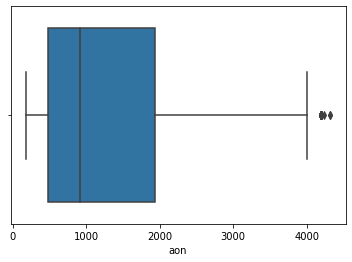

In [560]:
# Lets see the AON: Age on Network feature

sns.boxplot(x = df_new.aon, data = df_new, whis = 1.5)
plt.show()

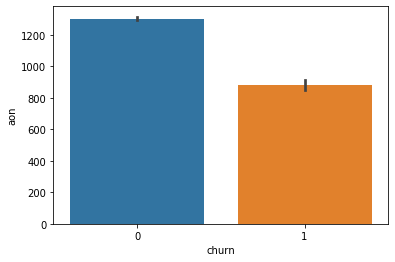

In [561]:
sns.barplot(y = df_new.aon, x = df_new.churn, data = df_new)
plt.show()

Customers that have been on the network for a shorter time are more likely to churn. Seems like older customers are fairly loyal.

In [562]:
def plot_box(a,b,c):    
    fig, ax = plt.subplots(1,3, sharey = True, figsize = [14,7])
    sns.boxplot(x = df_new.churn, y = a, orient = 'v', data = df_new, ax = ax[0])
    sns.boxplot(x = df_new.churn, y = b, orient = 'v', data = df_new, ax = ax[1])
    sns.boxplot(x = df_new.churn, y = c, orient = 'v', data = df_new, ax = ax[2])
    plt.yscale('log')
    plt.show()

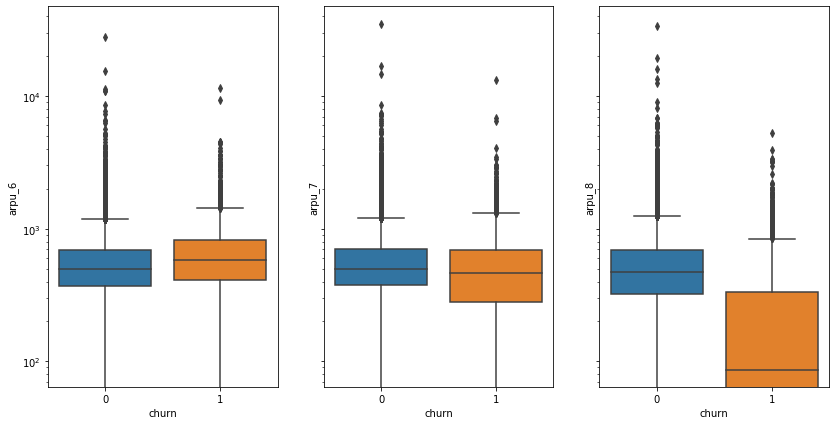

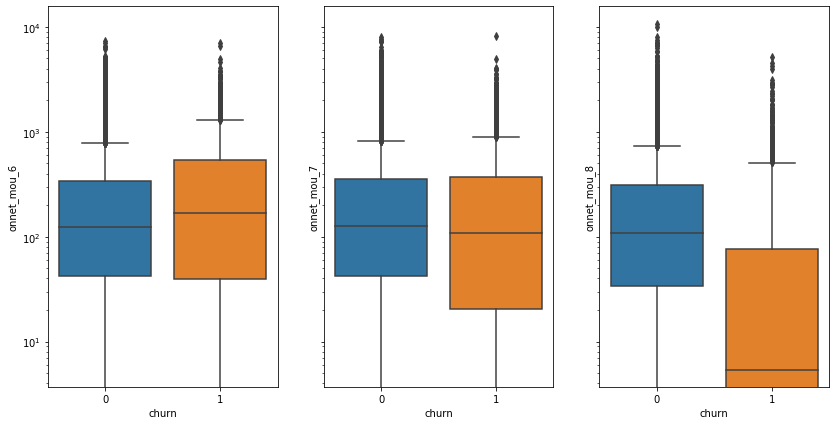

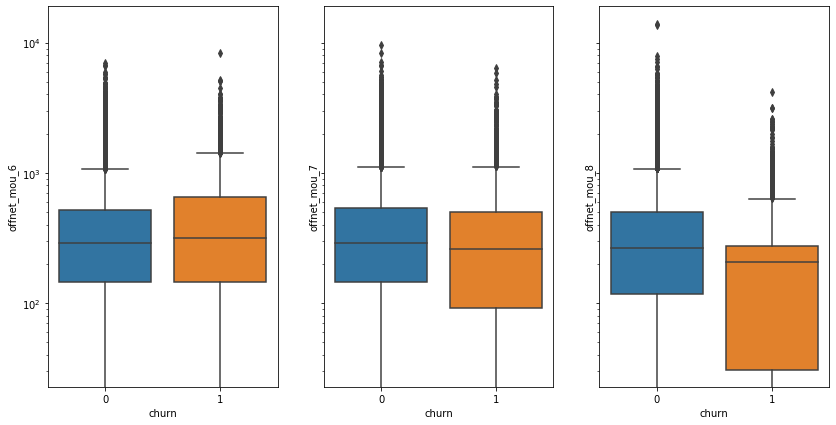

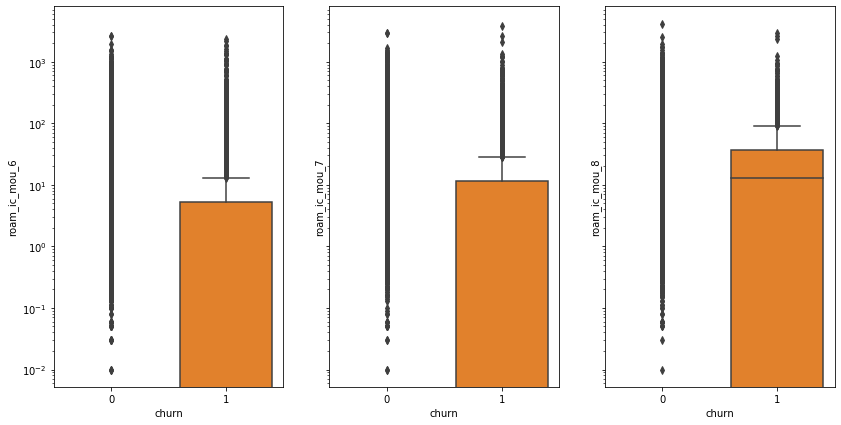

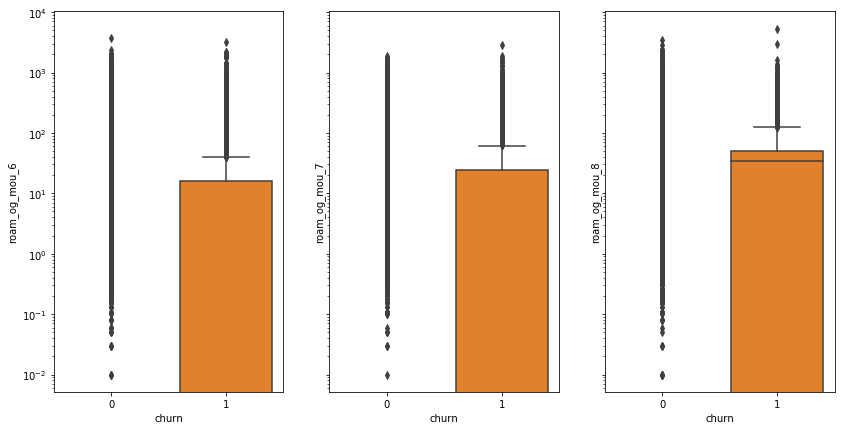

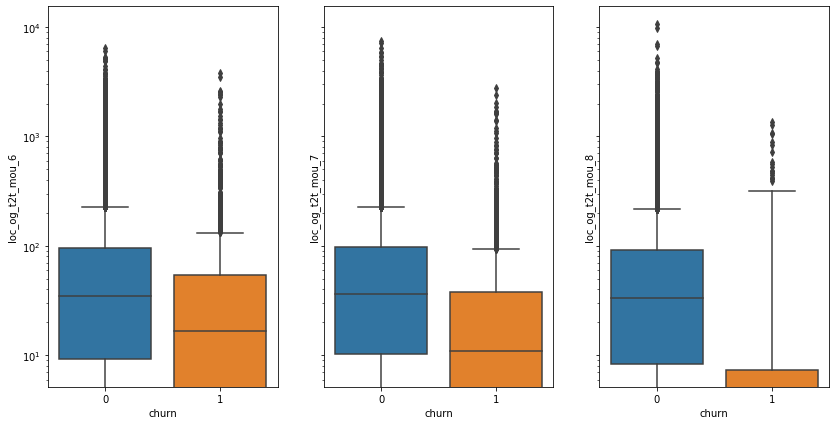

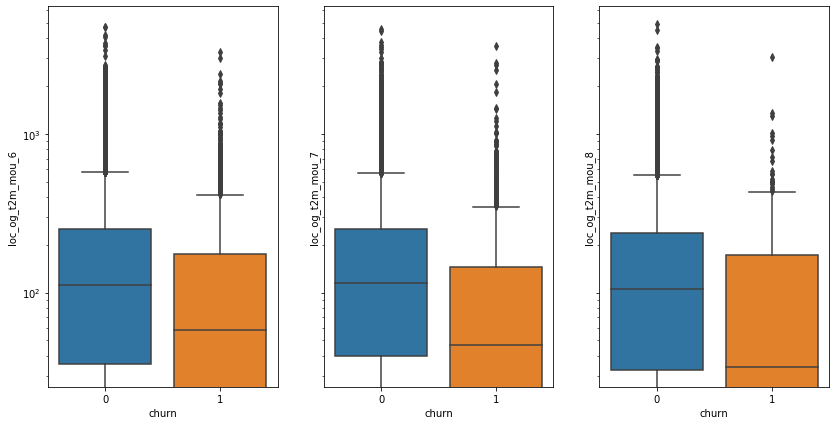

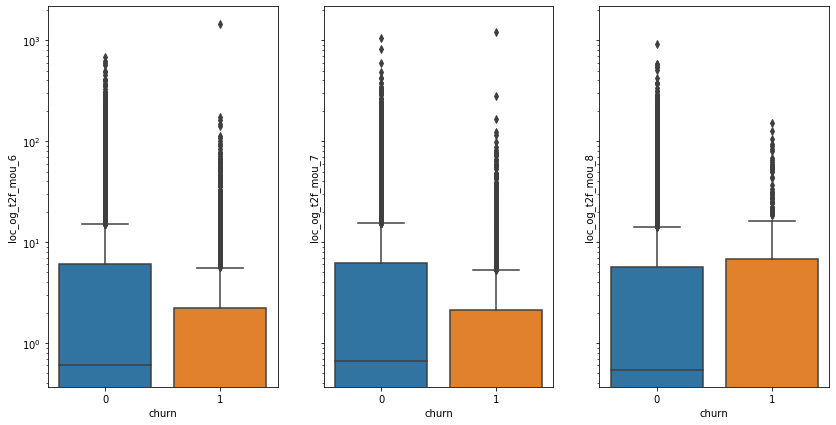

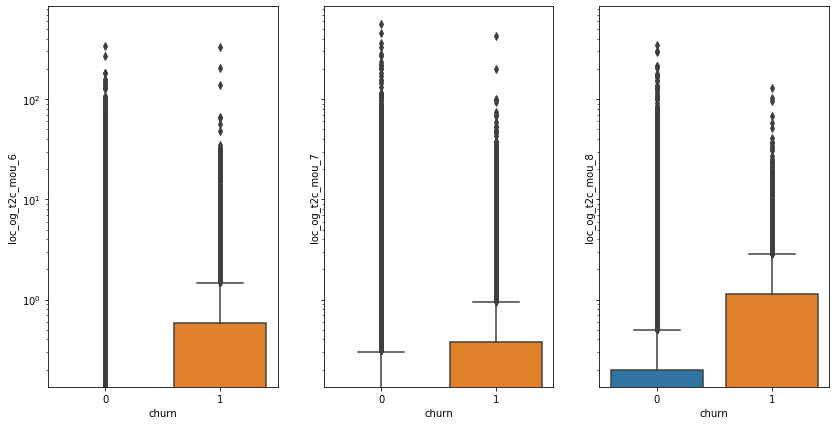

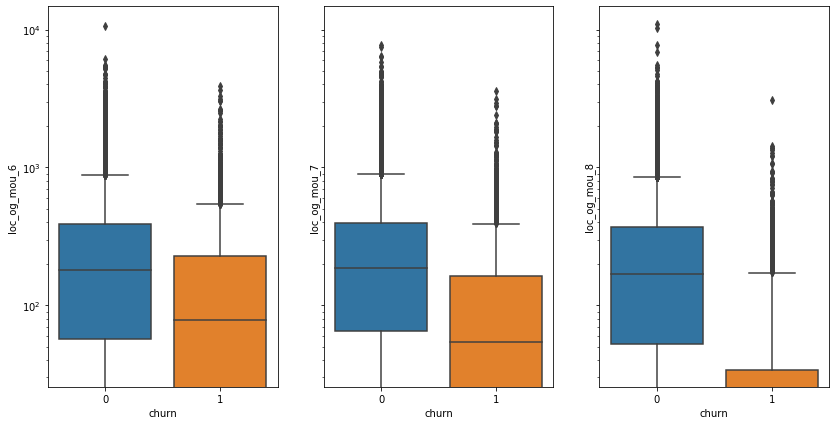

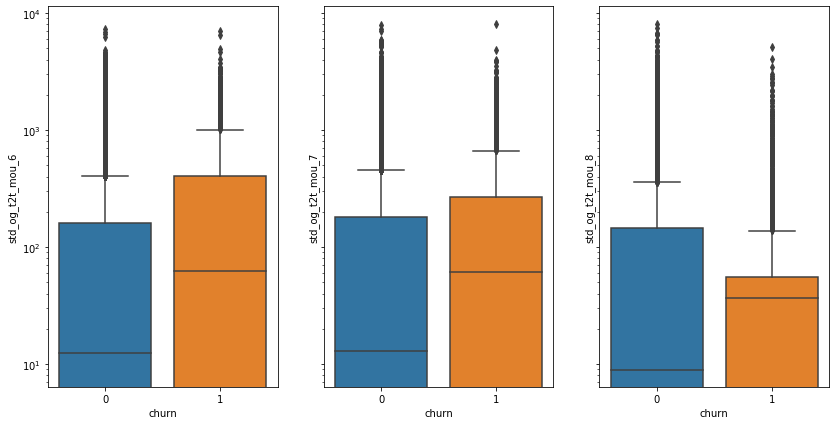

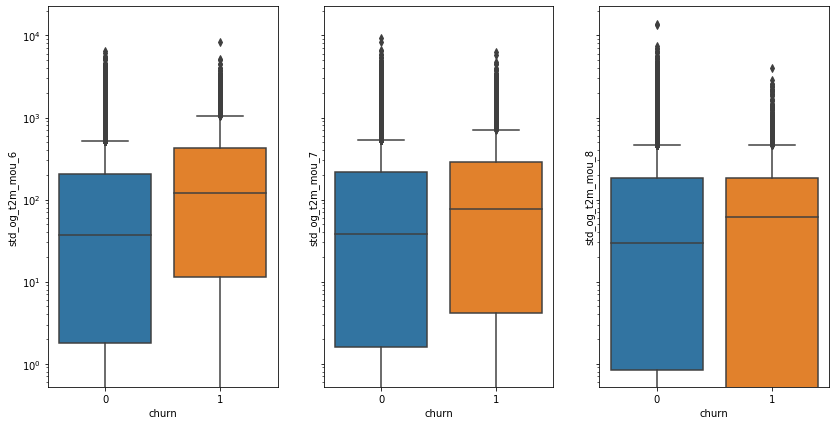

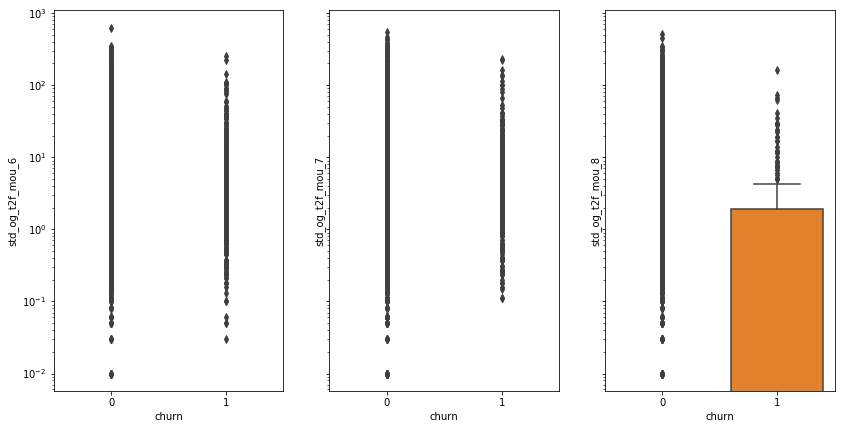

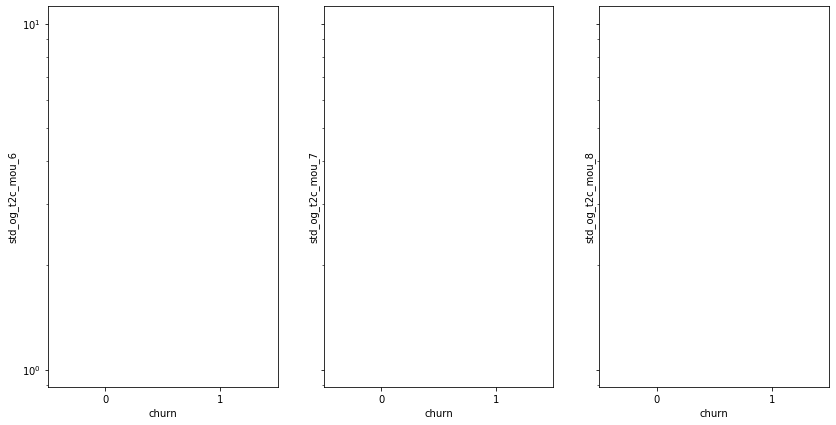

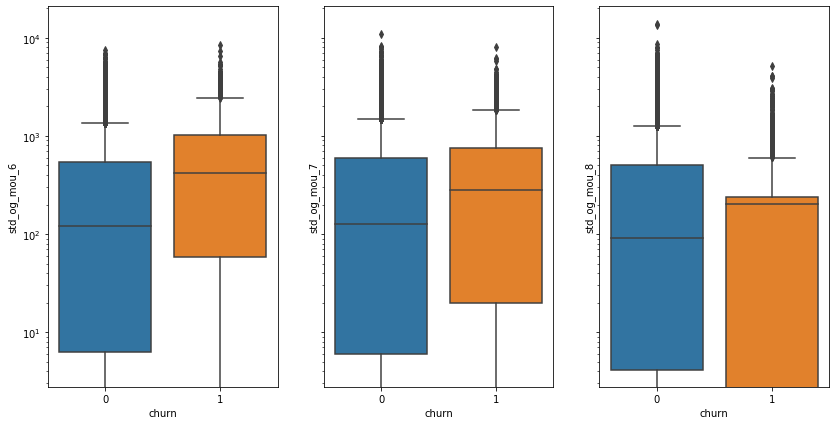

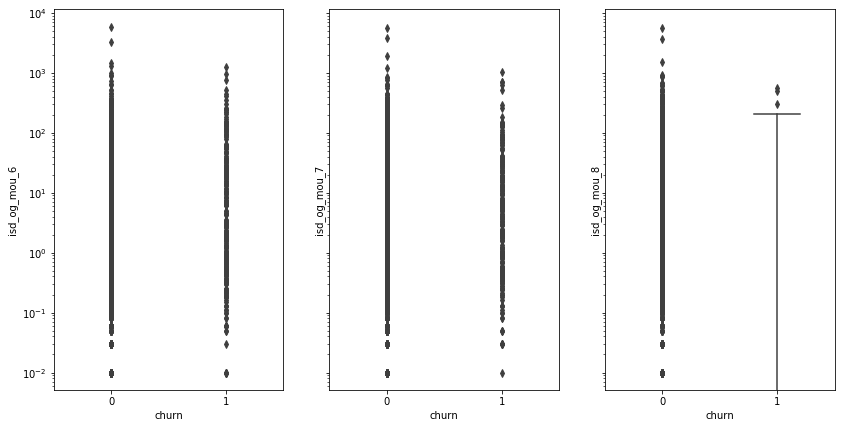

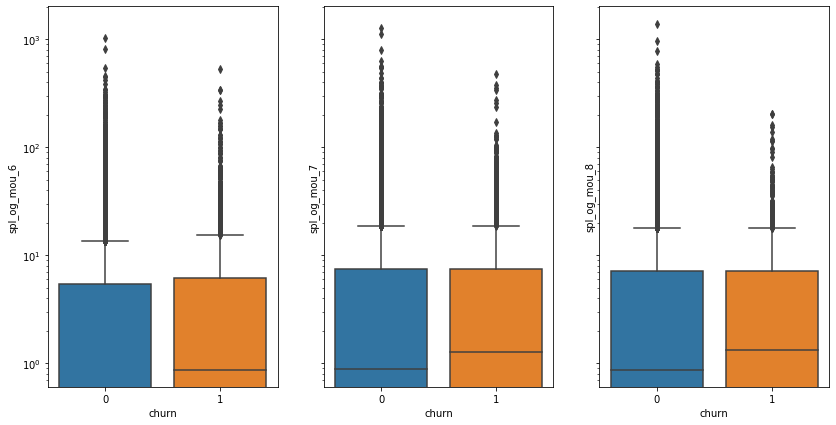

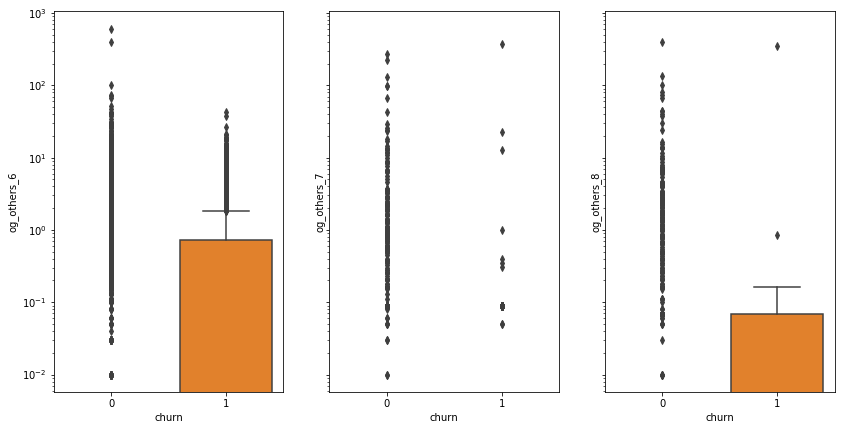

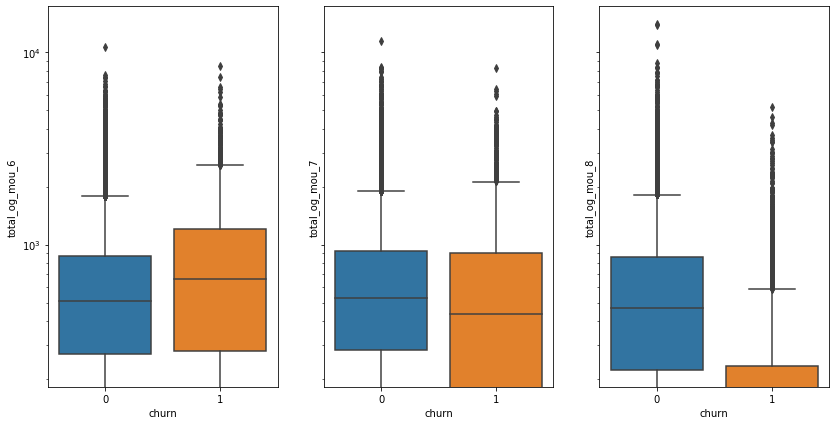

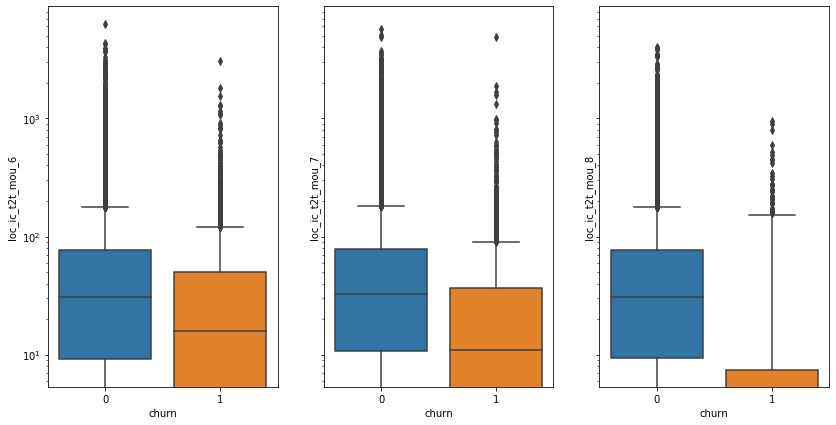

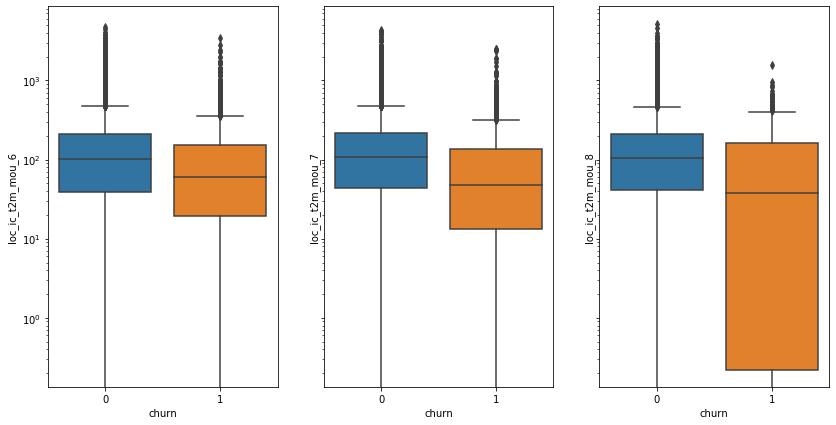

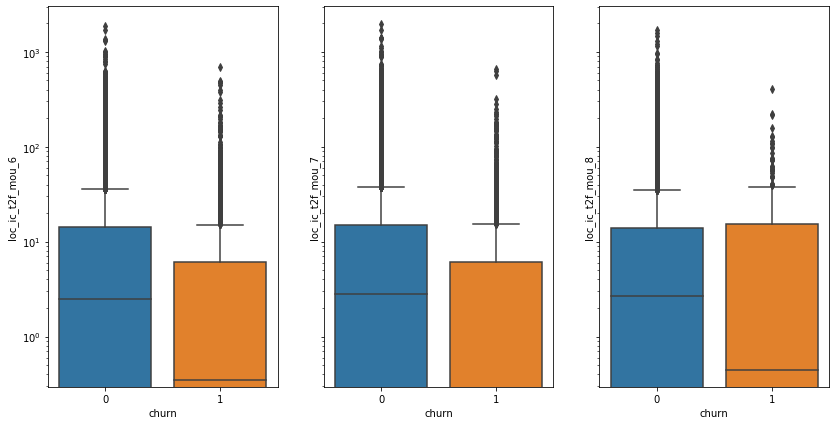

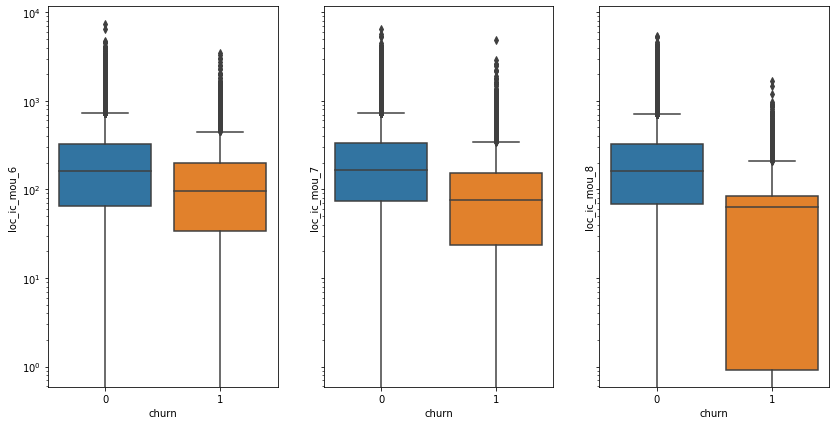

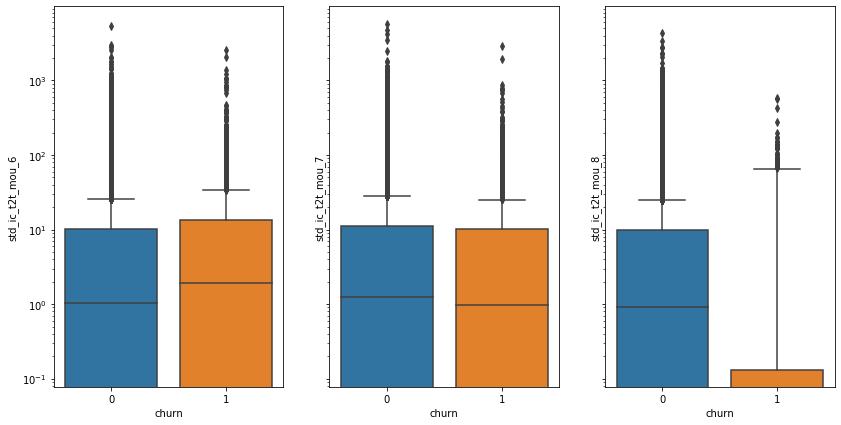

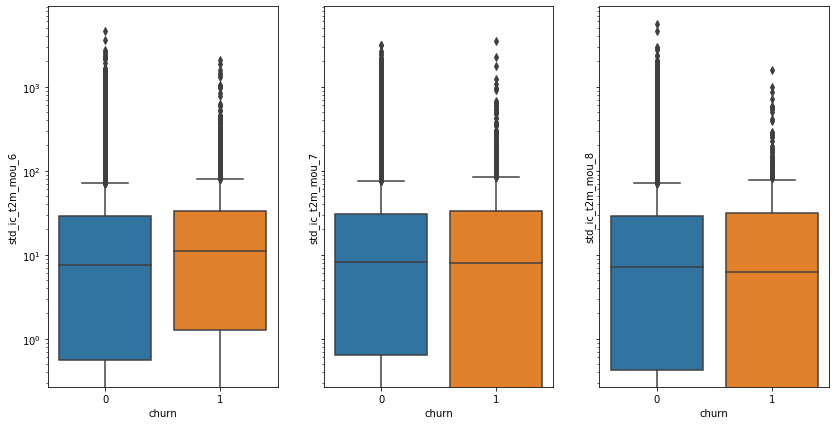

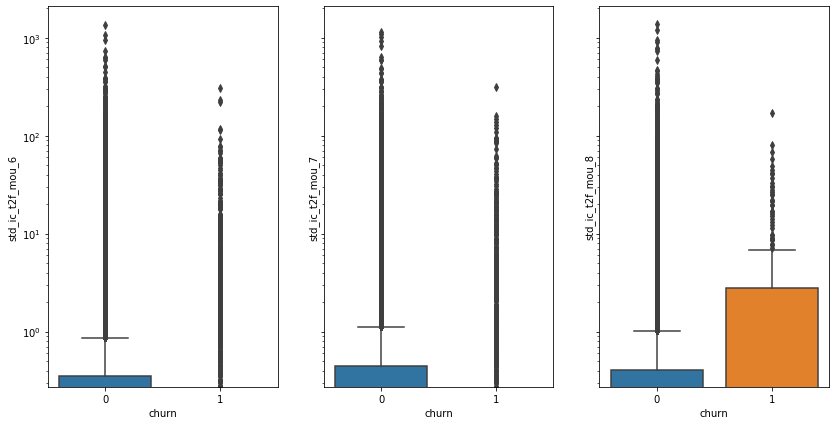

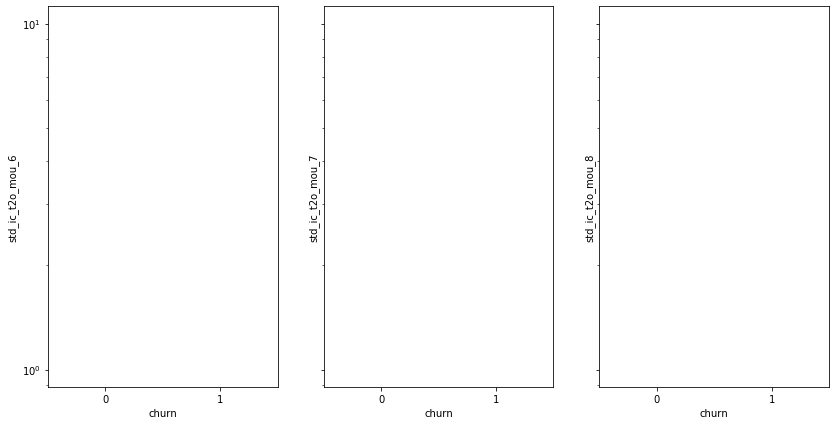

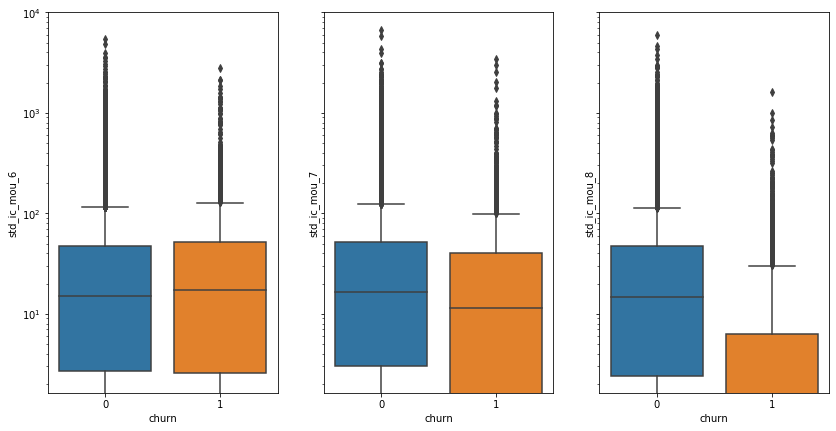

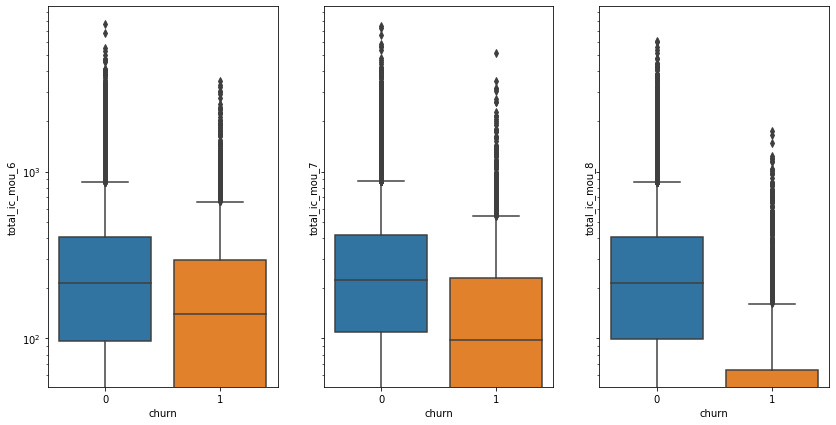

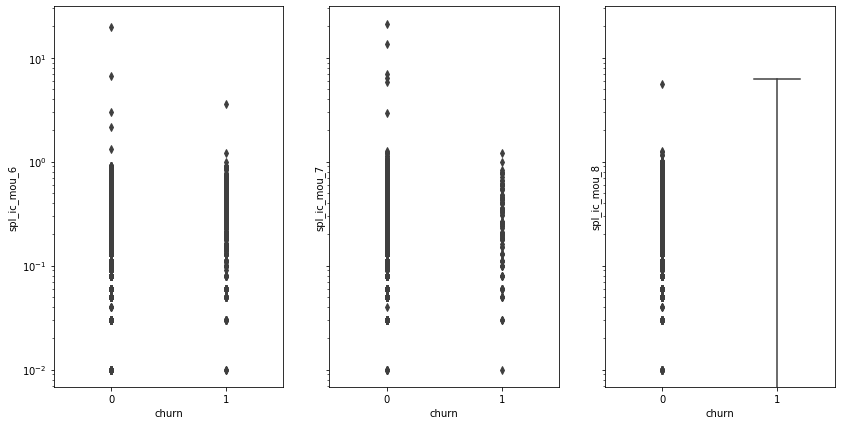

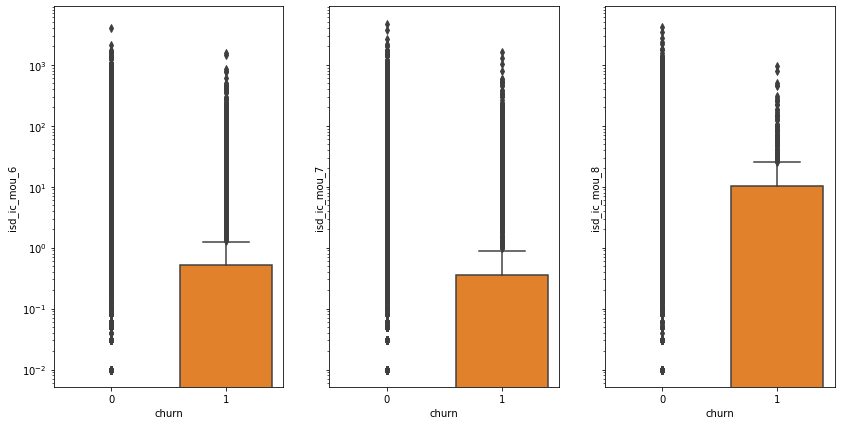

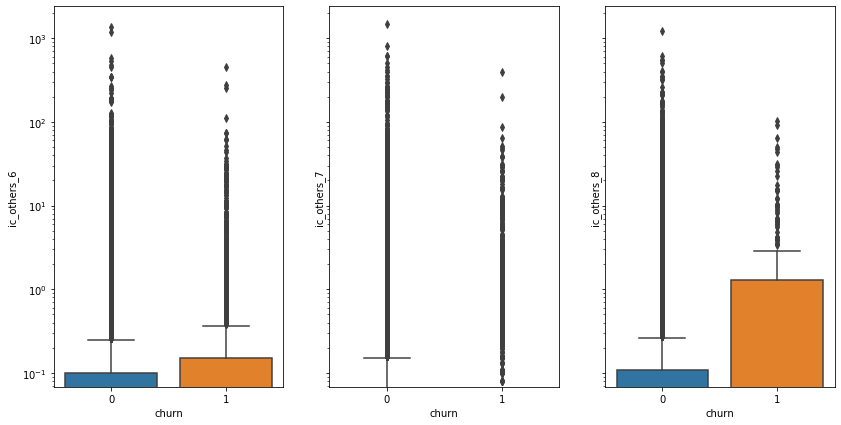

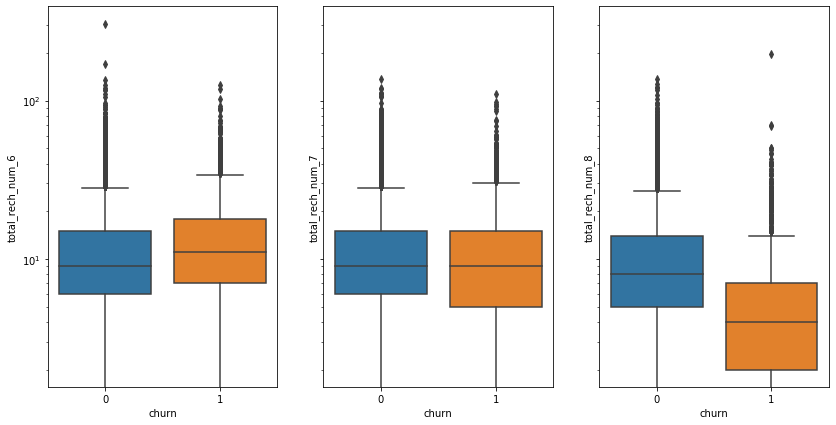

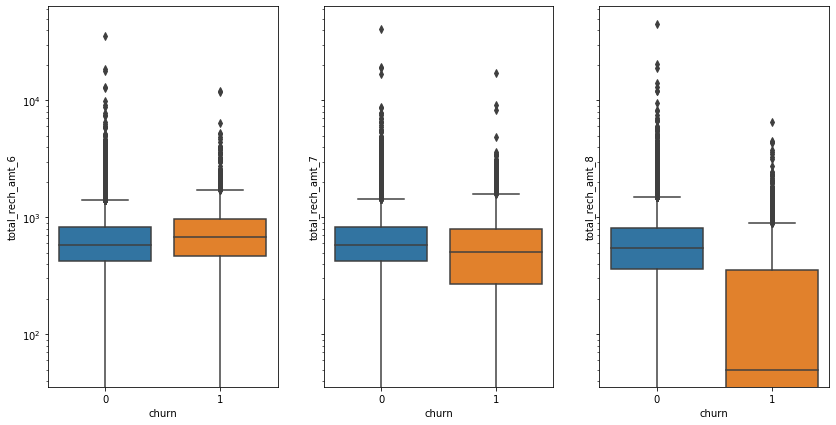

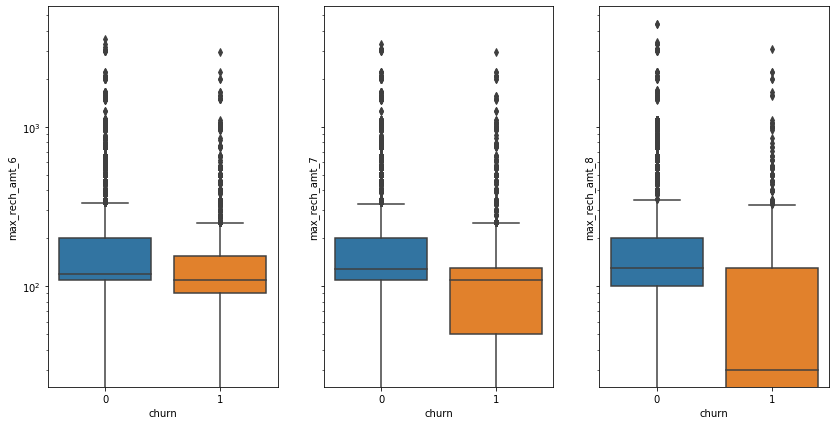

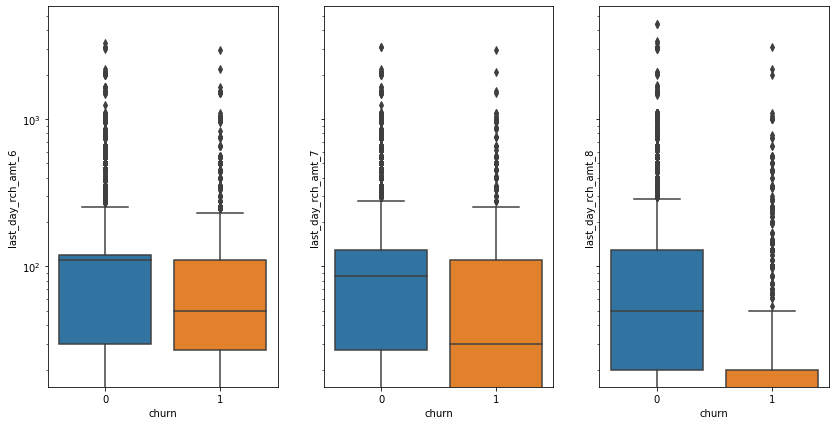

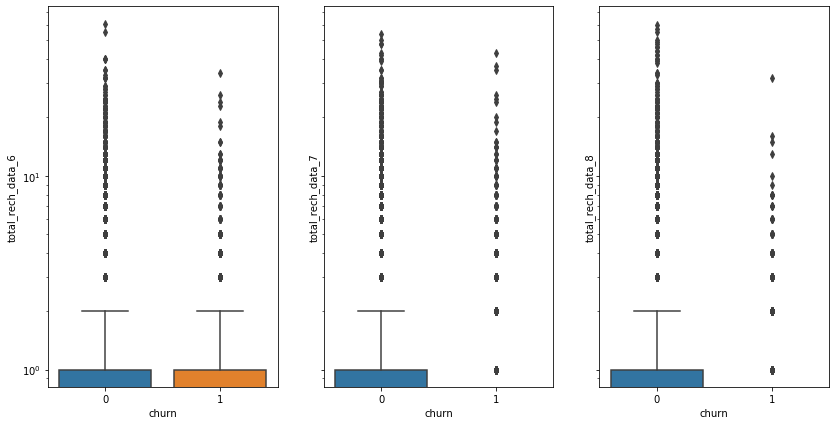

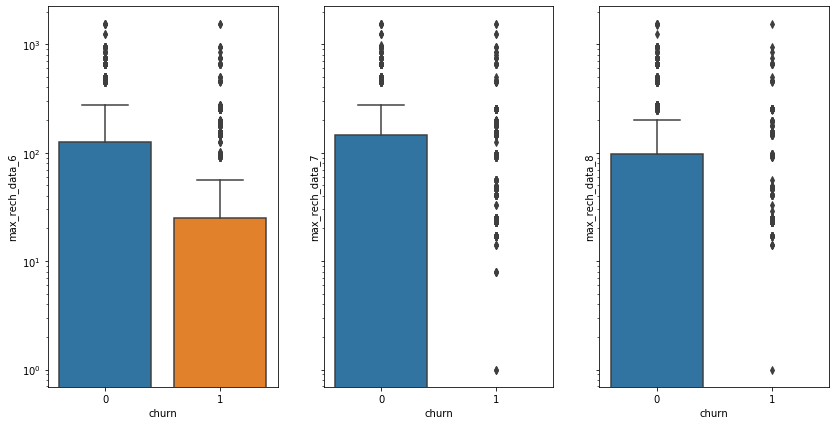

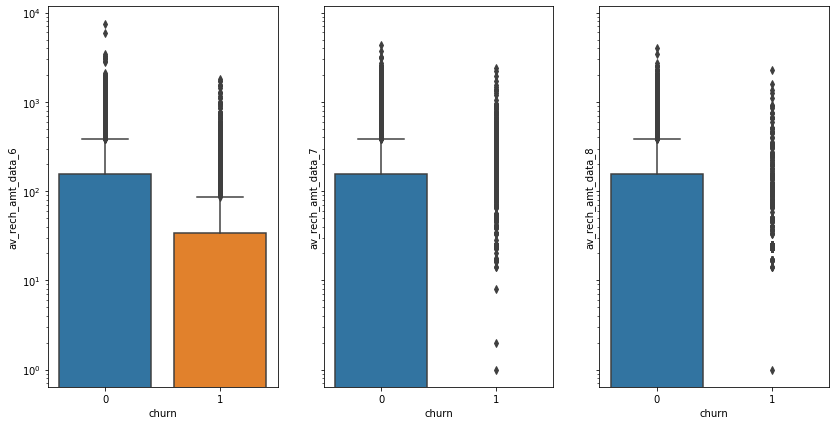

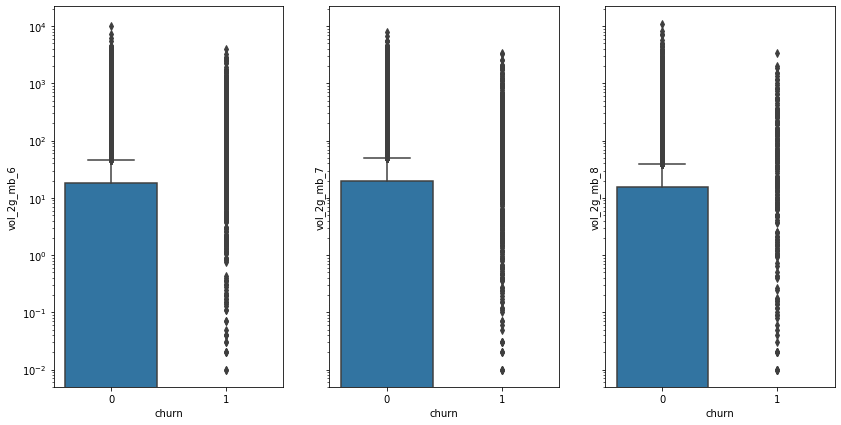

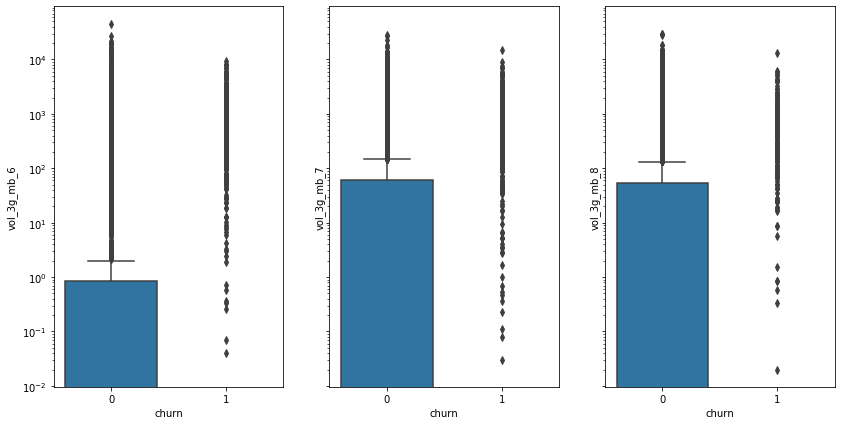

In [563]:
for i in range(0,len(df_new.columns)-23,3):
    plot_box(df_new[df_new.columns[i]],df_new[df_new.columns[i+1]],df_new[df_new.columns[i+2]])

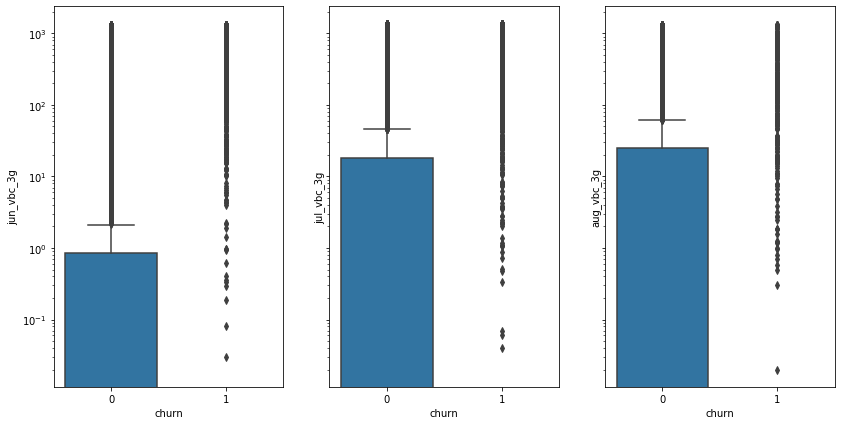

In [572]:
plot_box(df_new.jun_vbc_3g,df_new.jul_vbc_3g,df_new.aug_vbc_3g)

**So, as seen or rather inferred from the boxplots above, the values for most of the features are reducing over the course of three months for churn tagged customers, which makes sense. These customers are not satisfied with the services or prices, or maybe getting better offers from other operators and so they are starting to show signs of churn by spending less and demonstrating lesser consumption of services.**

**Interstingly, the boxplots revealed another insight about the features related to roaming and international calls and messages. These features portray an increase in activity by the churn tagged users from June to August, which could mean that their need to avail these services may have arisen just about recently and they weren't content with them. This could be a sign to improve these particular services for these particular customers by maybe offering them better offers and discounts in order to retain them.
These insights could be used to engineer new features to enhance the predictive power of the models. Lets see that in Feature Engineering.**

The boxlots also suggest something fishy about the following features: std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8.

In [564]:
df_new.std_og_t2c_mou_6.describe()

count    30000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2c_mou_6, dtype: float64

In [565]:
df_new.std_ic_t2o_mou_6.describe()

count    30000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_6, dtype: float64

In [566]:
# Dropping these

df_new.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis = 1, inplace = True)

As seen from the boxplots, there are outliers present in mopst of the features. Lets deal with them next.

### Handling Outliers

**Lets cap outliers using the k-sigma technique**

In [567]:
df_new.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 140 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [568]:
def cap_outliers(f, k = 3):
    upper = f.mean() + k*f.std()
    lower = f.mean() - k*f.std()
    f.loc[f > upper] = upper
    f.loc[f < lower] = lower
    return f 

In [569]:
nums = df_new.select_dtypes(include = 'float64')
num_cols = nums.columns

In [570]:
df_new[num_cols] = df_new[num_cols].apply(cap_outliers, axis = 0)

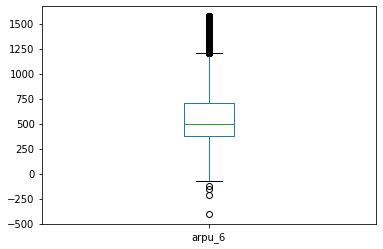

In [571]:
# Lets take an example to see about the outliers

df_new.arpu_6.plot.box()
plt.show()

The outliers are still there but its much more balanced and centered than before. Lets create some new features now.

## Feature Engineering

Since, the trends in customer behavior and patterns over the course of three months from June till August is a decent indicator of the possibility of the churn, lets introduce a new feature for every customer metric that stores the difference between the action phase (August) and the average of good phase (June and July).

In [573]:
df_new['arpu_diff'] = df_new['arpu_8'] - (df_new['arpu_7'] + df_new['arpu_6'])/2
df_new['onnet_mou_diff'] = df_new['onnet_mou_8'] - (df_new['onnet_mou_7'] + df_new['onnet_mou_6'])/2
df_new['offnet_mou_diff'] = df_new['offnet_mou_8'] - (df_new['offnet_mou_7'] + df_new['offnet_mou_6'])/2
df_new['roam_ic_mou_diff'] = df_new['roam_ic_mou_8'] - (df_new['roam_ic_mou_7'] + df_new['roam_ic_mou_6'])/2
df_new['roam_og_mou_diff'] = df_new['roam_og_mou_8'] - (df_new['roam_og_mou_7'] + df_new['roam_og_mou_6'])/2
df_new['loc_og_mou_diff'] = df_new['loc_og_mou_8'] - (df_new['loc_og_mou_7'] + df_new['loc_og_mou_6'])/2
df_new['std_og_mou_diff'] = df_new['std_og_mou_8'] - (df_new['std_og_mou_7'] + df_new['std_og_mou_6'])/2
df_new['isd_og_mou_diff'] = df_new['isd_og_mou_8'] - (df_new['isd_og_mou_7'] + df_new['isd_og_mou_6'])/2
df_new['spl_og_mou_diff'] = df_new['spl_og_mou_8'] - (df_new['spl_og_mou_7'] + df_new['spl_og_mou_6'])/2
df_new['total_og_mou_diff'] = df_new['total_og_mou_8'] - (df_new['total_og_mou_7'] + df_new['total_og_mou_6'])/2
df_new['loc_ic_mou_diff'] = df_new['loc_ic_mou_8'] - (df_new['loc_ic_mou_7'] + df_new['loc_ic_mou_6'])/2
df_new['std_ic_mou_diff'] = df_new['std_ic_mou_8'] - (df_new['std_ic_mou_7'] + df_new['std_ic_mou_6'])/2
df_new['isd_ic_mou_diff'] = df_new['isd_ic_mou_8'] - (df_new['isd_ic_mou_7'] + df_new['isd_ic_mou_6'])/2
df_new['spl_ic_mou_diff'] = df_new['spl_ic_mou_8'] - (df_new['spl_ic_mou_7'] + df_new['spl_ic_mou_6'])/2
df_new['total_ic_mou_diff'] = df_new['total_ic_mou_8'] - (df_new['total_ic_mou_7'] + df_new['total_ic_mou_6'])/2
df_new['total_rech_num_diff'] = df_new['total_rech_num_8'] - (df_new['total_rech_num_7'] + df_new['total_rech_num_6'])/2
df_new['total_rech_amt_diff'] = df_new['total_rech_amt_8'] - (df_new['total_rech_amt_7'] + df_new['total_rech_amt_6'])/2
df_new['max_rech_amt_diff'] = df_new['max_rech_amt_8'] - (df_new['max_rech_amt_7'] + df_new['max_rech_amt_6'])/2
df_new['av_rech_amt_data_diff'] = df_new['av_rech_amt_data_8'] - (df_new['av_rech_amt_data_7'] + df_new['av_rech_amt_data_6'])/2
df_new['total_rech_data_diff'] = df_new['total_rech_data_8'] - (df_new['total_rech_data_7'] + df_new['total_rech_data_6'])/2
df_new['max_rech_data_diff'] = df_new['max_rech_data_8'] - (df_new['max_rech_data_7'] + df_new['max_rech_data_6'])/2
df_new['vol_2g_mb_diff'] = df_new['vol_2g_mb_8'] - (df_new['vol_2g_mb_7'] + df_new['vol_2g_mb_6'])/2
df_new['vol_3g_mb_diff'] = df_new['vol_3g_mb_8'] - (df_new['vol_3g_mb_7'] + df_new['vol_3g_mb_6'])/2

In [574]:
df_new.shape

(30000, 163)

Finally, lets build some models.

## Modelling

In [654]:
# Train test split

X = df_new.drop('churn',axis=1)
y = df_new['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 42, stratify = y)

In [655]:
# Scaling the data

scale = StandardScaler()
cols_to_scale = df_new.columns.drop('churn',1)
X_train[cols_to_scale] = scale.fit_transform(X_train[cols_to_scale])

In [656]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,av_rech_amt_data_diff,total_rech_data_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
7560,-0.506894,-0.716493,0.088623,-0.563176,-0.499134,-0.004887,-0.045527,-0.595869,-0.597003,-0.320441,-0.276379,-0.303082,-0.335787,-0.305133,-0.320293,-0.109778,0.046333,1.179019,0.990096,-0.085987,-0.178698,0.545686,0.458133,0.283745,-0.217294,-0.337776,-0.356345,0.596781,-0.038306,0.450294,-0.537995,-0.537520,-0.499152,-0.584841,-0.578302,-0.553435,-0.259834,-0.252418,-0.254945,-0.726734,-0.722834,-0.667057,0.009423,0.013562,0.14032,-0.382032,-0.505192,-0.508950,-0.365572,-0.047304,-0.057261,-0.374665,-0.714846,-0.371635,-0.203572,0.244122,0.974184,0.290629,-0.341008,0.146962,0.429538,0.077208,0.060561,0.145936,-0.151748,0.452938,-0.372626,-0.369697,-0.317031,-0.506892,-0.507787,-0.497138,-0.27797,-0.280214,-0.281445,-0.550347,-0.548863,-0.520889,-0.082887,-0.342612,0.187620,0.080008,0.098288,0.186149,-0.266742,-0.272092,-0.270599,-0.215717,-0.233036,-0.235946,-0.239891,-0.437623,-0.485362,-0.321748,-0.954661,0.077119,-0.328543,-0.874105,-0.068660,0.132840,-0.644651,0.541337,-0.550682,-0.544331,-0.545205,-0.605025,-0.607977,-0.585746,-0.567565,-0.576245,-0.561231,-0.365728,-0.361239,-0.341667,-0.401487,-0.415444,-0.40471,-0.776719,-0.787306,-0.788584,-0.354959,-0.359269,-0.33642,-0.368197,-0.373525,-0.39432,-0.350905,-0.34847,-0.341354,-0.24143,-0.235361,-0.218054,-0.775244,-0.784218,-0.776028,1.167885,-0.403929,-0.401954,-0.387592,0.794036,0.793204,-0.350457,0.031725,0.045671,0.274782,0.150649,0.150032,-0.074827,0.235344,0.826198,0.084931,-0.002928,0.170456,0.682041,-0.196745,0.805354,0.687508,0.047243,-0.027454,0.046382,0.063712,0.008094
18504,-0.670915,-0.

Now, the predictive models will have two goals:
- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

1st goal: Lets begin with the first goal by proceeding with applying PCA to reduce the number of dimensions to avoid Multicollinearity and/or overfitting. Lets do 2 dimensions first to visualize the dataset with the target variable to get a better understanding of the data distribution.

In [657]:
pca_visualize = IncrementalPCA(n_components = 2)
pca_data = pca_visualize.fit_transform(X_train)

In [658]:
pca_visualize.components_

array([[ 0.04518958,  0.05999561,  0.08781354, -0.06545081, -0.06015794,
        -0.03369489, -0.01830422, -0.01211985,  0.01285825,  0.00337492,
        -0.00020933, -0.00196538, -0.01273205, -0.0145638 , -0.01339542,
         0.05670199,  0.06138603,  0.07539903,  0.08685936,  0.09248844,
         0.09877751,  0.07414951,  0.07540863,  0.07656519,  0.00090385,
        -0.00161458,  0.00270339,  0.09095679,  0.09845162,  0.10882422,
        -0.09795296, -0.09395503, -0.07592093, -0.08074982, -0.07504876,
        -0.05864045,  0.03129029,  0.03237703,  0.03455862, -0.1171132 ,
        -0.11059803, -0.08594964,  0.00472113,  0.01167869,  0.03578245,
        -0.00524135, -0.01286068, -0.003662  , -0.02273612,  0.00352806,
         0.00300883, -0.05673963, -0.04955894, -0.01410225,  0.07620645,
         0.08110901,  0.09249488,  0.10584733,  0.11264324,  0.11653363,
         0.08213645,  0.08255898,  0.08311921,  0.1169464 ,  0.12411454,
         0.13052502, -0.00129177,  0.00302635,  0.0

In [659]:
pca_visualize.explained_variance_ratio_

array([0.1099811 , 0.08608746])

Seems like almost 19% of the variance is explained by first two principle components.

In [660]:
pca_data = pd.DataFrame(pca_data,columns = ['PCA1','PCA2'],index = y_train.index)
pca_data = pd.concat([pca_data,y_train],axis = 1)
pca_data.head()

,PCA1,PCA2,churn
7560,-1.122658,1.237029,0
18504,-5.574069,-1.290952,0
2247,-7.327922,-0.243572,1
1316,-3.732238,-0.009144,0
29773,-4.724185,-1.316941,0


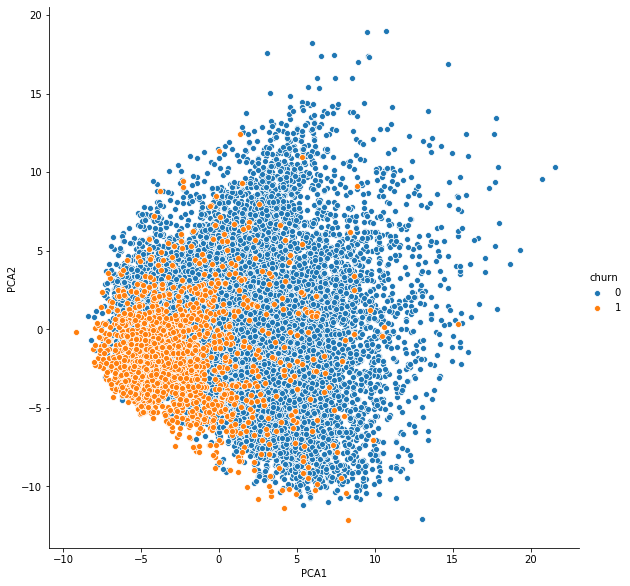

In [661]:
# Lets visualize

sns.pairplot(x_vars = 'PCA1', y_vars = 'PCA2', hue = 'churn', data = pca_data, size = 8)
plt.show()

The classes aren't exactly linearly seperable. Non-linear models are going to shine out.

In [662]:
# Lets calculate appropriate number of PC's

pca = PCA(random_state = 0)
pca.fit(X_train)

PCA(random_state=0)

In [663]:
pca.explained_variance_ratio_

array([1.10026661e-01, 8.64354169e-02, 6.68325330e-02, 5.37631137e-02,
       4.19573125e-02, 3.64491483e-02, 3.07813079e-02, 2.76258073e-02,
       2.43586084e-02, 2.31174355e-02, 2.10973248e-02, 1.91313477e-02,
       1.86012790e-02, 1.76941780e-02, 1.74084417e-02, 1.61812183e-02,
       1.50153923e-02, 1.45502182e-02, 1.38284778e-02, 1.35707000e-02,
       1.32515144e-02, 1.16754374e-02, 1.13560671e-02, 1.05138311e-02,
       1.02520469e-02, 1.00018575e-02, 9.50411273e-03, 9.30980474e-03,
       9.05954167e-03, 8.42511988e-03, 8.30573177e-03, 8.04249067e-03,
       7.91604213e-03, 7.72952325e-03, 7.65536862e-03, 7.41519445e-03,
       7.13767217e-03, 6.71584550e-03, 6.51699116e-03, 6.48294711e-03,
       5.55921748e-03, 5.44511139e-03, 5.38831696e-03, 5.25986529e-03,
       5.06778021e-03, 4.82189445e-03, 4.58466522e-03, 4.39621904e-03,
       4.05415911e-03, 3.90574680e-03, 3.59433053e-03, 3.49354137e-03,
       3.44517221e-03, 3.42713670e-03, 3.36053129e-03, 3.32533140e-03,
      

In [664]:
cums = np.cumsum(pca.explained_variance_ratio_)

In [665]:
cums

array([0.11002666, 0.19646208, 0.26329461, 0.31705772, 0.35901504,
       0.39546419, 0.42624549, 0.4538713 , 0.47822991, 0.50134734,
       0.52244467, 0.54157602, 0.5601773 , 0.57787147, 0.59527992,
       0.61146113, 0.62647653, 0.64102674, 0.65485522, 0.66842592,
       0.68167744, 0.69335287, 0.70470894, 0.71522277, 0.72547482,
       0.73547668, 0.74498079, 0.75429059, 0.76335014, 0.77177526,
       0.78008099, 0.78812348, 0.79603952, 0.80376904, 0.81142441,
       0.81883961, 0.82597728, 0.83269312, 0.83921012, 0.84569306,
       0.85125228, 0.85669739, 0.86208571, 0.86734557, 0.87241335,
       0.87723525, 0.88181991, 0.88621613, 0.89027029, 0.89417604,
       0.89777037, 0.90126391, 0.90470908, 0.90813622, 0.91149675,
       0.91482208, 0.91801781, 0.92113827, 0.92422924, 0.92718989,
       0.9300847 , 0.93291269, 0.93571641, 0.93836229, 0.94091794,
       0.94332603, 0.9456728 , 0.94787554, 0.95000207, 0.95209369,
       0.95411929, 0.95609409, 0.95797961, 0.95983544, 0.96164

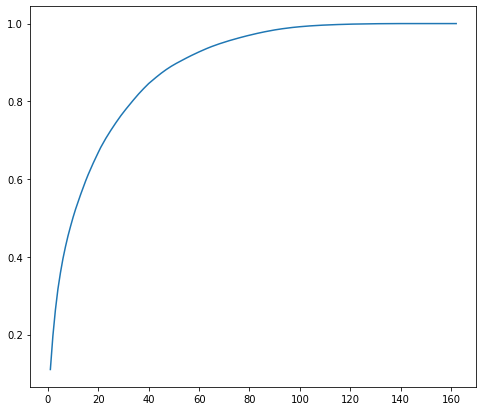

In [666]:
plt.figure(figsize = [8,7])
plt.plot(range(1,len(cums)+1),cums)
plt.show()

95% of the variance is being explained by top 70 prinicple components.

In [705]:
pca_final = PCA(n_components = 70, random_state = 0)
pca_data_final = pca_final.fit_transform(X_train)

In [706]:
pca_data_final.shape

(21000, 70)

**Lets start with a simple linear model: Logistic Regression. As the target variable is highly imbalanced, lets also make use of the class weight function.**

In [707]:
# the class weight is used to handle class imbalance - it adjusts the cost function.

lin = LogisticRegression(class_weight = 'balanced')
lin.fit(pca_data_final,y_train)

LogisticRegression(class_weight='balanced')

Cross-Validation score.

In [713]:
# ROC-AUC Score with cross-validation

cross_val_score(lin,pca_data_final,y_train,scoring = 'roc_auc',cv = 4).mean()

0.9005325563424931

In [712]:
# Recall Score with cross-validation

cross_val_score(lin,pca_data_final,y_train,scoring = 'recall',cv = 4)

array([0.82112069, 0.79956897, 0.80387931, 0.84051724])

In [730]:
# Hyper-parameter tuning with Logistic Regression

params_lr = {'C': [0.1,0.2,0.5,1.0,5.0,10.0,20.0,50.0,100.0],
             'penalty': ['l1','l2']}

grid_lr = GridSearchCV(estimator = lin,
                       param_grid = params_lr,
                       scoring = 'roc_auc',
                       verbose = 1,
                       cv = 5,
                       refit = True)

In [731]:
grid_lr.fit(pca_data_final,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.1, 0.2, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0,
                               100.0],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [734]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.9014869375359087


#### Evaluate on thest set

In [733]:
# Processing the test-data first

X_test[cols_to_scale] = scale.transform(X_test[cols_to_scale])
pca_test_lr = pca_final.transform(X_test)

In [735]:
y_test_pred = grid_lr.predict(pca_test_lr)
y_test_pred_proba = grid_lr.predict_proba(pca_test_lr)

In [738]:
recall_score = metrics.recall_score(y_test,y_test_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
roc_auc_score = metrics.roc_auc_score(y_test,y_test_pred_proba[:,1])

print(recall_score)
print(confusion_matrix)
print(roc_auc_score)

0.8278894472361809
[[7040 1164]
 [ 137  659]]
0.9101567381029968


**Random Forest**

In [727]:
# Lets do a dry run with the default hyperparameters first

rf_def = RandomForestClassifier(class_weight = 'balanced')
rf_def.fit(pca_data_final,y_train)

RandomForestClassifier(class_weight='balanced')

In [728]:
cross_val_score(rf_def,pca_data_final,y_train,scoring = 'roc_auc',cv = 4).mean()

0.8940043900492816

In [740]:
# Hyper-parameter tuning with Random Forest

params_rf = {'max_depth': [2,3,4,5,6,7,8],
             'criterion': ['gini','entropy'],
             'max_features': ['auto',0.4,0.6,0.8,1.0]}

grid_rf = GridSearchCV(estimator = rf_def,
                       param_grid = params_rf,
                       scoring = 'roc_auc',
                       verbose = 1,
                       n_jobs = -1,
                       cv = 5,
                       refit = True)

In [741]:
grid_rf.fit(pca_data_final,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 92.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 0.4, 0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [742]:
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)
print(grid_rf.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 0.4}
RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=0.4)
0.9011424900677192


#### Evaluate

In [743]:
y_test_pred = grid_rf.predict(pca_test_lr)
y_test_pred_proba = grid_rf.predict_proba(pca_test_lr)

In [744]:
recall_score = metrics.recall_score(y_test,y_test_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
roc_auc_score = metrics.roc_auc_score(y_test,y_test_pred_proba[:,1])

print(recall_score)
print(confusion_matrix)
print(roc_auc_score)

0.7185929648241206
[[7600  604]
 [ 224  572]]
0.9088023001403899


PCA with Logistic Regression gave the best results. Lets visualize the Roc curve before moving on to the 2nd goal.

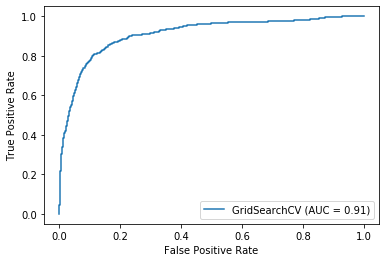

In [747]:
metrics.plot_roc_curve(grid_lr,pca_test_lr,y_test)

### 2nd Goal: Important Features for interpretability

We gotta use the original dataset to find the important features. Let's use the logistic regression first. Butwe have to deal with Multicollinearity first.

**Recursive Feature Elimination** to find the relevant features in order to prevent Multicollinearity.

In [752]:
lr = LogisticRegression(class_weight = 'balanced')
rfe = RFECV(lr, min_features_to_select = 20, cv = 4)
rfe.fit(X_train,y_train)

RFECV(cv=4, estimator=LogisticRegression(class_weight='balanced'))

In [755]:
# Optimal number of features as given by RFE

rfe.n_features_

79

In [758]:
updated_cols = X_train.columns[rfe.support_]
updated_cols

Index(['arpu_7', 'arpu_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_8', 'total_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'total_rech_num_6', 'total_rech_num_7',
       'total_re

In [760]:
# Lets run a Logistic model with grid search CV

params_lr2 = {'C': [0.1,0.2,0.5,1.0,5.0,10.0,20.0,50.0,100.0],
             'penalty': ['l1','l2']}

grid_lr2 = GridSearchCV(estimator = lr,
                       param_grid = params_lr2,
                       scoring = 'roc_auc',
                       verbose = 1,
                       cv = 5,
                       refit = True)

In [761]:
grid_lr2.fit(X_train[updated_cols],y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.1, 0.2, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0,
                               100.0],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [762]:
print(grid_lr2.best_params_)
print(grid_lr2.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.9056185341051831


In [766]:
lr = LogisticRegression(class_weight = 'balanced', C = 0.1)
lr.fit(X_train[updated_cols],y_train)

LogisticRegression(C=0.1, class_weight='balanced')

In [767]:
y_test_pred = lr.predict(X_test[updated_cols])
y_test_pred_proba = lr.predict_proba(X_test[updated_cols])

In [768]:
recall_score = metrics.recall_score(y_test,y_test_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
roc_auc_score = metrics.roc_auc_score(y_test,y_test_pred_proba[:,1])

print(recall_score)
print(confusion_matrix)
print(roc_auc_score)

0.835427135678392
[[7066 1138]
 [ 131  665]]
0.9112389102999149


In [782]:
lr.coef_

array([[ 0.37951315,  0.52666594,  0.24257049, -0.20515735,  0.10841834,
         0.26962959, -0.41483439, -0.10449415, -0.09061764, -0.59670455,
        -0.15663651,  0.2207976 ,  0.10652062,  0.42637274, -0.38412116,
        -0.24353416,  0.16263165, -0.280538  , -0.49444459, -0.146963  ,
         0.18996633,  0.43761943,  0.7349721 ,  0.20220493, -0.2815731 ,
        -0.29245047, -0.36513522,  0.13789557,  0.13148894, -0.33701041,
         0.31523935,  0.25602452, -0.78687846, -0.13999746,  0.14433991,
        -0.16605901, -0.08593131,  0.27552035, -0.33436853, -0.15999856,
         0.10265186, -0.1471108 , -0.08069919,  0.11544639, -0.23376146,
        -0.37014504,  0.10009858, -0.1879743 ,  0.09881823, -0.22509522,
        -0.30262289, -0.28508178,  0.12814259,  0.11443721, -0.49797051,
         0.14492948, -0.19645222, -0.13688282, -0.34635457, -0.23033588,
        -0.10358715, -0.13283231, -0.16541495,  0.15656169,  0.11159755,
         0.13123614, -0.2462114 , -0.57722187, -0.2

In [796]:
feature_imp_lr = pd.DataFrame({'Features': np.asarray(updated_cols).reshape(lr.coef_.shape[1],),'Coefficients': lr.coef_.reshape(lr.coef_.shape[1],)},index = range(lr.coef_.shape[1]))
feature_imp_lr = feature_imp_lr.sort_values(by = 'Coefficients',ascending = False)
feature_imp_lr

,Features,Coefficients
22,std_og_mou_8,0.734972
70,std_og_mou_diff,0.568978
1,arpu_8,0.526666
69,loc_og_mou_diff,0.437682
21,std_og_mou_7,0.437619
13,loc_og_mou_8,0.426373
0,arpu_7,0.379513
30,loc_ic_t2m_mou_6,0.315239
37,std_ic_t2t_mou_7,0.275520
5,roam_og_mou_8,0.269630


Lets try feature importances from Random Forest.

In [798]:
rf2 = RandomForestClassifier(class_weight = 'balanced', oob_score = True)

In [800]:
params_rf2 = {'max_depth': [3,5,7],
             'max_features': ['auto',0.4,0.6]}

grid_rf2 = GridSearchCV(estimator = rf2,
                       param_grid = params_rf2,
                       scoring = 'roc_auc',
                       verbose = 1,
                       n_jobs = -1,
                       cv = 5,)

In [801]:
grid_rf2.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.4min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['auto', 0.4, 0.6]},
             scoring='roc_auc', verbose=1)

In [802]:
print(grid_rf2.best_params_)
print(grid_rf2.best_score_)

{'max_depth': 7, 'max_features': 0.6}
0.9290907141135376


In [803]:
rf_final = RandomForestClassifier(class_weight = 'balanced', max_features = 0.6, max_depth = 7, oob_score = True)
rf_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=0.6,
                       oob_score=True)

In [804]:
rf_final.oob_score_

0.918952380952381

In [805]:
y_test_pred = rf_final.predict(X_test)
y_test_pred_proba = rf_final.predict_proba(X_test)

In [806]:
recall_score = metrics.recall_score(y_test,y_test_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
roc_auc_score = metrics.roc_auc_score(y_test,y_test_pred_proba[:,1])

print(recall_score)
print(confusion_matrix)
print(roc_auc_score)

0.7814070351758794
[[7720  484]
 [ 174  622]]
0.9384092114644408


So, AUC score from the Random Forest is by far the best : 0.94

In [808]:
feature_importances = rf_final.feature_importances_

In [813]:
feature_imp_rf = pd.DataFrame({'Features': X_train.columns,'Importance': feature_importances*100})
feature_imp_rf = feature_imp_rf.sort_values(by = 'Importance',ascending = False)
feature_imp_rf[:20]

,Features,Importance
80,total_ic_mou_8,32.720777
14,roam_og_mou_8,8.242431
29,loc_og_mou_8,8.087952
11,roam_ic_mou_8,5.033279
56,loc_ic_t2t_mou_8,3.543001
139,arpu_diff,3.203093
53,total_og_mou_8,2.974368
95,total_rech_amt_8,2.909115
155,total_rech_amt_diff,2.710676
101,last_day_rch_amt_8,1.991948


## Business Insights

Considering both the feature importance from the Random forest and coefficients from Logistic Regression, following pointers can be inferred:
- The telecom operator needs to evaluate and revamp its roaming rates and STD call services as they seem quite relevant and has significant impact on the churn. They need to provide good offers to the customers who are using services from a roaming zone.
- The company needs to focus on the ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.